In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance/notebooks


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Student_Performance_Por'
EXPERIMENT_SESSION_UUID = '647daccf-7c14-463c-99ab-ef16972dba80'
SENSITIVE_ATTRS = ['sex']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(216, 21)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:47:19.513,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.0,0.926380,0.957447,1.000000,0.000000,0.884058,1.000000,0.000000,0
1,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:48:48.382,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.7,0.920245,0.946809,1.000000,0.000000,0.884058,1.000000,0.000000,0
48,Aleatoric_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:47:19.513,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.0,0.232721,0.202090,0.178627,0.729987,0.274451,0.222223,0.672693,0
49,Aleatoric_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:48:48.382,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.7,0.237910,0.230086,0.210367,0.581098,0.248570,0.204056,0.587984,0
96,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:47:19.513,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.0,0.956522,0.975309,1.000000,0.000000,0.929825,1.000000,0.000000,0
97,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:48:48.382,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.7,0.953069,0.969325,1.000000,0.000000,0.929825,1.000000,0.000000,0
144,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:47:19.513,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.0,0.036496,0.048193,0.000000,1.000000,0.018519,0.000000,1.000000,0
145,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:48:48.382,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.7,0.036496,0.048193,0.000000,1.000000,0.018519,0.000000,1.000000,0
192,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:47:19.513,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.0,0.269231,0.000000,0.000000,NaN,0.466667,0.000000,1.000000,0
193,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2023-12-26 23:48:48.382,647daccf-7c14-463c-99ab-ef16972dba80,Exp_iter_1,100,...,"[0.0, 0.7]",0.7,0.307692,0.090909,0.000000,1.000000,0.466667,0.000000,1.000000,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

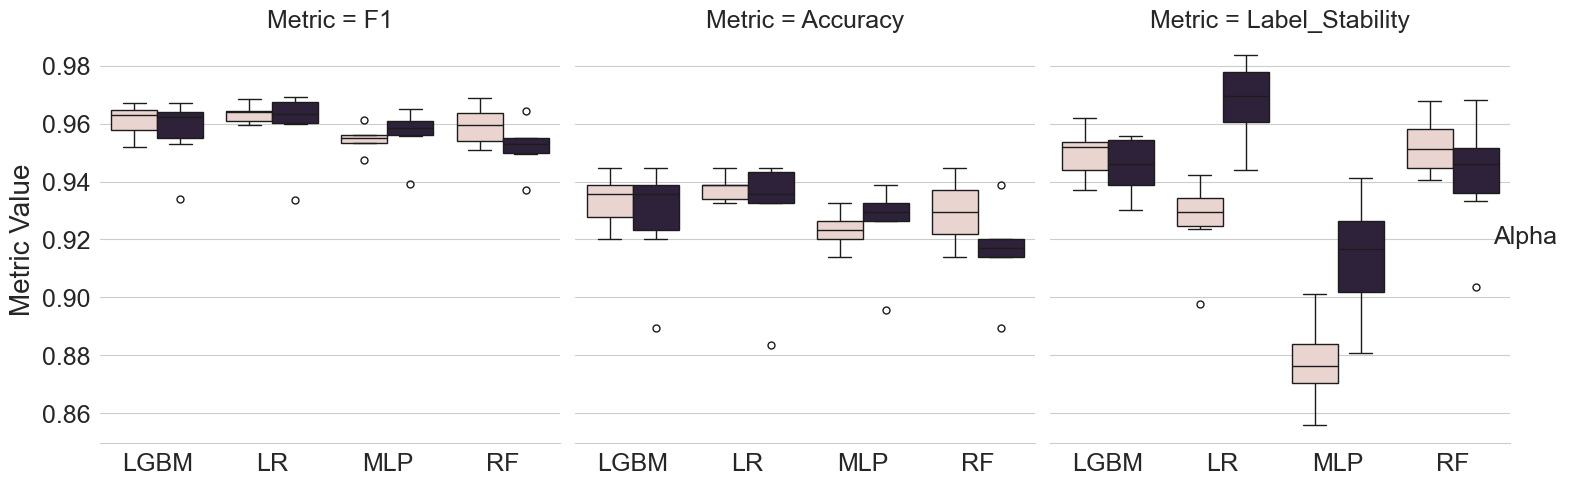

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

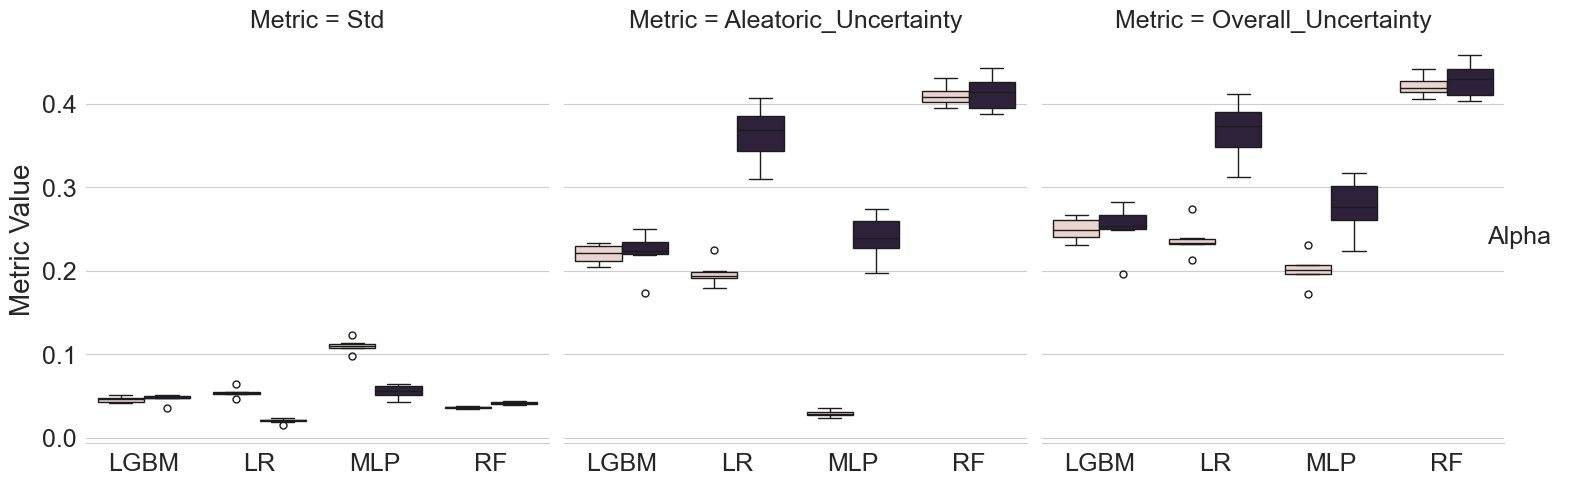

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_names=['Std', 'Aleatoric_Uncertainty', 'Overall_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

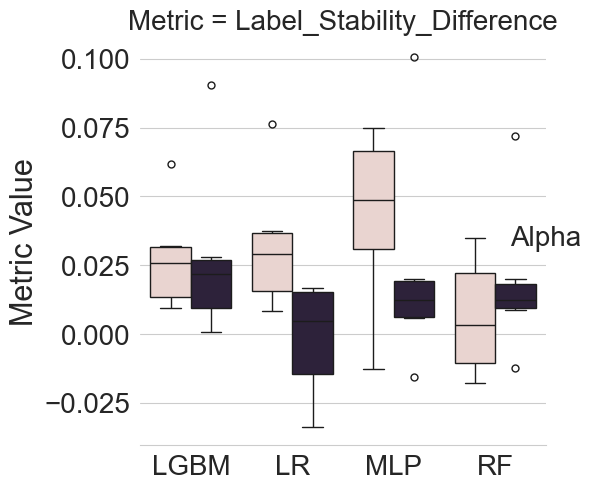

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

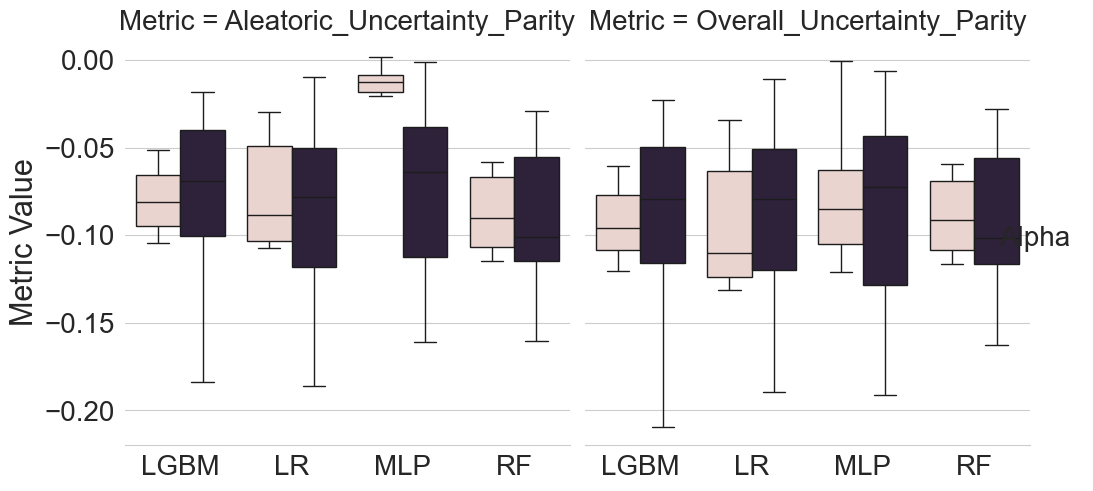

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Aleatoric_Uncertainty_Parity',
                                                         'Overall_Uncertainty_Parity'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

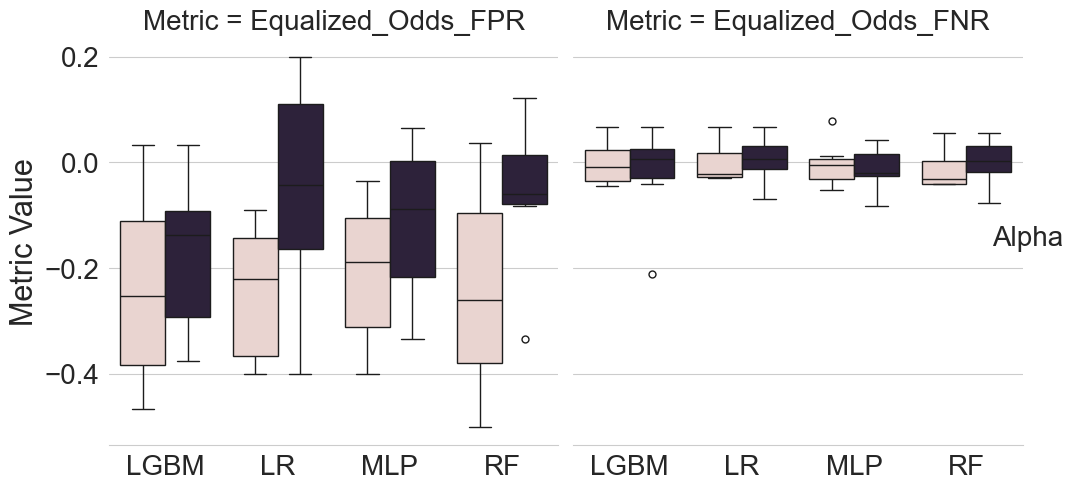

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

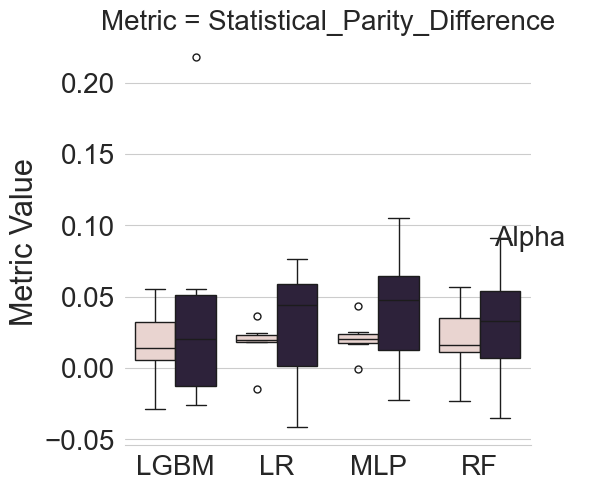

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)